# Main Notebook

## Import Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from uszipcode import SearchEngine
from IPython.display import Image
import time

# Data Prep / Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Linear Regression w/ l2 norm (Ridge)
from linear_reg import lr_gridsearch
from sklearn.linear_model import Ridge

# Random Forest
from random_forest import rf_train, feat_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

# Feature importance
from sklearn.inspection import permutation_importance

## Import Data

In [2]:
df_X = pd.read_csv('.\Data\df_X.csv')
df_y = pd.read_csv('.\Data\df_y.csv')
X = df_X.to_numpy()
y = df_y.to_numpy()

# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# standardize X
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

features = df_X.columns.tolist()

# ML
## Linear Regression

In [10]:
models = []


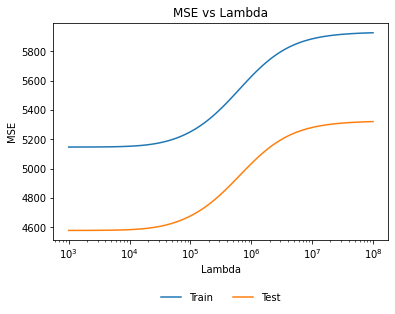

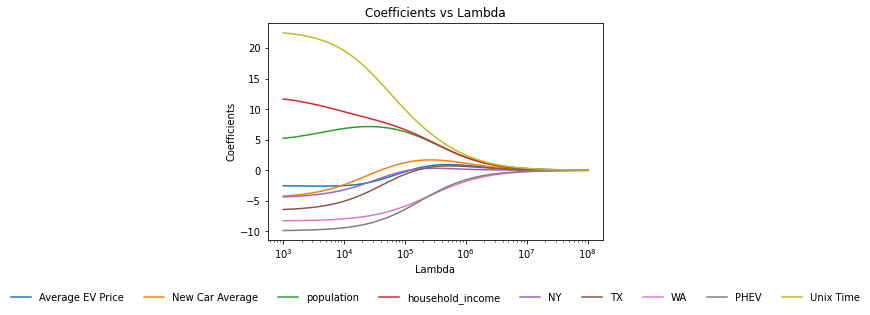

In [3]:
model_lr, lmbd, MSE_lr = lr_gridsearch(Ridge, X_train, X_test, y_train, y_test, features)
models.append(model_lr)

## Random Forest

In [8]:
# random forest wants 1d array
model_rf = rf_train(X_train, y_train.flatten())
models.append(model_rf)

Initial default model time =  51.30322003364563
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ................max_features=1;, score=-3511.720 total time=  19.9s
[CV 2/5] END ................max_features=1;, score=-3167.204 total time=  20.7s
[CV 3/5] END ................max_features=1;, score=-3140.755 total time=  19.5s
[CV 4/5] END ................max_features=1;, score=-4055.193 total time=  19.0s
[CV 5/5] END ................max_features=1;, score=-3142.356 total time=  18.8s
[CV 1/5] END ................max_features=2;, score=-3295.239 total time=  20.3s
[CV 2/5] END ................max_features=2;, score=-2992.261 total time=  20.9s
[CV 3/5] END ................max_features=2;, score=-2912.061 total time=  20.8s
[CV 4/5] END ................max_features=2;, score=-3817.160 total time=  20.2s
[CV 5/5] END ................max_features=2;, score=-2846.084 total time=  24.8s
CV model time =  235.9959647655487
Optimal model time =  29.976378440856934


Elapsed time to compute the importances: 0.289 seconds
Elapsed time to compute the importances: 341.112 seconds


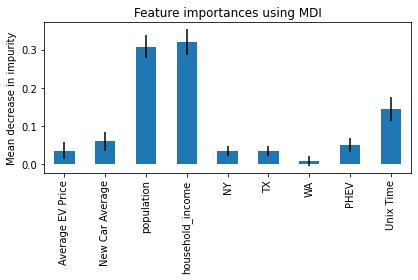

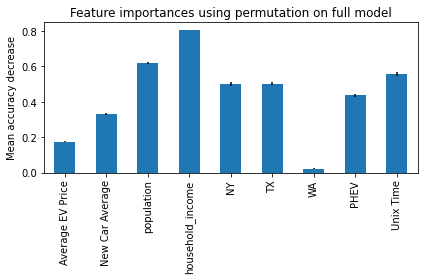

In [9]:
feat_importance(model_rf, X_train, y_train, features)

# Visualizations

In [22]:
def metrics(X, y, model, Train=True):
    t = 'Train' if Train else 'Test' 
    y_hat = model.predict(X)
    mse = mean_squared_error(y, y_hat)
    model_type = str(type(model))
    model_type = model_type.split(".")[-1]

    print(model_type, t, ' mse = ', round(mse,0))

    return model_type, mse

In [23]:
MSEs = []
for model in models:
    MSEs.append(metrics(X_test, y_test, model, Train=False))


Ridge'> Test  mse =  4578.0
RandomForestRegressor'> Test  mse =  2670.0


In [24]:
MSEs

[("Ridge'>", 4578.317717213961),
 ("RandomForestRegressor'>", 2670.342746787834)]